In [33]:
import numpy as np
import pandas as pd
import os
import json

import imageio
import geopandas
from shapely.geometry import Point, Polygon

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

# Sample points uniformly from India polygon

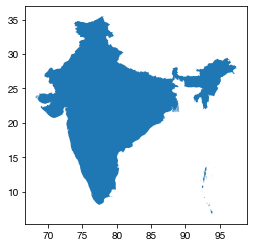

In [2]:
india = geopandas.read_file('../mount/data/gadm36_IND_shp/gadm36_IND_0.shp')

fig, ax = plt.subplots(1)
india.plot(ax=ax)
plt.show()

In [3]:
geom = india.iloc[0]['geometry']

In [4]:
geom.bounds

(68.18624878, 6.75425577, 97.41516113, 35.50133133)

In [5]:
n_samples = 900
points = []
minx, miny, maxx, maxy = geom.bounds
print_every = 50

while len(points) < n_samples:

    lat = np.random.rand() * (maxy - miny) + miny
    lon = np.random.rand() * (maxx - minx) + minx

    point = Point([lon, lat])

    if point.within(geom):
        points.append([lon, lat])
        
    if len(points) % print_every == 0:
        print(len(points))

0
0
0
0
0
0
50
50
100
100
100
100
100
100
150
200
200
200
200
200
200
200
200
200
200
200
250
250
300
350
350
350
400
400
400
400
400
400
400
450
450
450
450
450
500
550
550
600
600
600
600
600
650
650
700
700
750
750
750
750
750
750
750
800
850
850
900


In [17]:
new_samples = pd.DataFrame(points, columns=['min_lon', 'min_lat'])
new_samples['image_id'] = [str(x).zfill(5) for x in 100 + np.arange(len(points))]

In [18]:
new_samples['max_lon'] = new_samples['min_lon'] + 1./(111111. * np.cos(new_samples['min_lat'] * np.pi / 180.)) * 450 * 3
new_samples['max_lat'] = new_samples['min_lat'] + 1./111111. * 450 * 3

In [19]:
new_samples.head()

,min_lon,min_lat,image_id,max_lon,max_lat
0,77.983321,35.213081,00100,77.998192,35.225231
1,75.136074,32.911163,00101,75.150547,32.923313
2,82.778463,19.306349,00102,82.791337,19.318499
3,77.390752,17.512222,00103,77.403493,17.524372
4,78.214133,30.518804,00104,78.228237,30.530954


In [20]:
samples = pd.read_csv('../data/planet/india/bbox100.csv')
samples['image_id'] = samples['image_id'].astype(str).str.zfill(5)

In [22]:
samples = pd.concat([samples, new_samples], sort=False).reset_index(drop=True)

In [23]:
samples[['image_id', 'min_lon', 'min_lat', 'max_lon', 'max_lat']].to_csv(
    '../data/planet/india/bbox1000.csv', index=False)

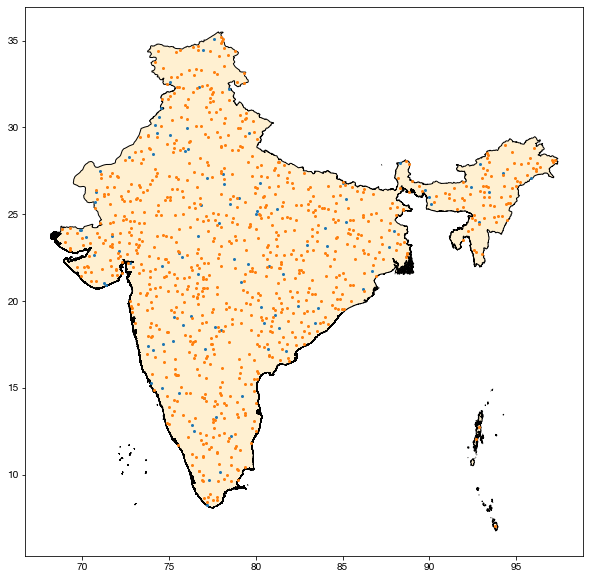

In [29]:
fig, ax = plt.subplots(1, figsize=(10,15))
india.plot(ax=ax, edgecolor='black', color='#fff0d1')
plt.scatter(samples[samples['image_id'] < '00100']['min_lon'], samples[samples['image_id'] < '00100']['min_lat'],
            alpha=1.0, color='C0', s=4)
plt.scatter(samples[samples['image_id'] >= '00100']['min_lon'], samples[samples['image_id'] >= '00100']['min_lat'],
            alpha=1.0, color='C1', s=4)
plt.show()

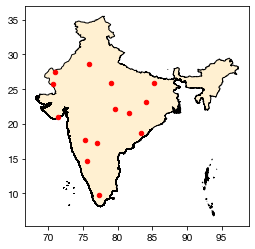

In [123]:
# plot one point at a time
# image_id = 15
image_ids = [0, 2, 3, 4, 5, 6, 7, 9, 10, 13, 14, 15, 38, 47]
samples = pd.read_csv('../data/planet/india/bbox100.csv')
# 0, 2, 3, 4, 5, 6, 7, 9, 10, 13, 14, 15, 
fig, ax = plt.subplots(1, figsize=(4,6))
india.plot(ax=ax, edgecolor='black', color='#fff0d1')

# for image_id in [60]:
#     row = samples[samples['image_id'] == image_id]
#     lat = (row['max_lat'].values[0] + row['min_lat'].values[0]) / 2
#     lon = (row['max_lon'].values[0] + row['min_lon'].values[0]) / 2
#     plt.scatter(lon, lat, color='red', s=20)
for image_id in image_ids:
    row = samples[samples['image_id'] == image_id]
    lat = (row['max_lat'].values[0] + row['min_lat'].values[0]) / 2
    lon = (row['max_lon'].values[0] + row['min_lon'].values[0]) / 2
    plt.scatter(lon, lat, color='red', s=20)
# for image_id in [47]: # 24, 25, 30, 31, 38, 42, 47, 60
#     row = samples[samples['image_id'] == image_id]
#     lat = (row['max_lat'].values[0] + row['min_lat'].values[0]) / 2
#     lon = (row['max_lon'].values[0] + row['min_lon'].values[0]) / 2
#     plt.scatter(lon, lat, color='C0', s=20)
plt.show()

In [25]:
# somehow i deleted the bbox file and have to reconstruct it from the geojson files...
geojson_dir = '../data/planet/india/input_locations/geojson/'
geojson_names = sorted(os.listdir(geojson_dir))

image_ids = []
min_lons = []
min_lats = []
max_lons = []
max_lats = []
for geojson_name in geojson_names:
    img_id = geojson_name.split('.')[0]
    with open(os.path.join(geojson_dir, '{}.geojson'.format(img_id))) as f:
        data = json.load(f)
    coords = np.array(data['features'][0]['geometry']['coordinates'][0])
    max_lon, max_lat = coords.max(axis=0)
    min_lon, min_lat = coords.min(axis=0)
    
    image_ids.append(img_id)
    min_lons.append(min_lon)
    min_lats.append(min_lat)
    max_lons.append(max_lon)
    max_lats.append(max_lat)

In [32]:
samples = pd.DataFrame({
    'image_id': image_ids,
    'min_lon': min_lons,
    'min_lat': min_lats,
    'max_lon': max_lons,
    'max_lat': max_lats
})
samples[['image_id', 'min_lon', 'min_lat', 'max_lon', 'max_lat']].to_csv(
    '../data/planet/india/bbox1000.csv', index=False)